# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [506]:
import numpy as np
np.random.seed(42) # For reproducibility
def initialize_network(input_size, hidden_layers, output_size):
    # Your code should contain the weights and biases
    # provide your code
    network = {} # initializing network 
    
    num_nodes_previous = input_size # number of nodes in previous layer

    # loop through each layer and randomly initialize the weights and biases associated with each node
    for layer in range(len(hidden_layers) + 1):
        if layer == len(hidden_layers): # if current node is output layer
            layer_name = 'output'
            num_nodes = output_size
        else: # otherwise
            layer_name = 'layer_{}'.format(layer+1)
            num_nodes = hidden_layers[layer]

        network[layer_name] = {} # initializing weights and biases of current layer
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2)
            }
        num_nodes_previous = num_nodes

    return network
        
 
# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)
print("<Jay > + Initialized Network:", network)

<Jay > + Initialized Network: {'layer_1': {'node_1': {'weights': array([0.37, 0.95, 0.73]), 'bias': array([0.6])}, 'node_2': {'weights': array([0.16, 0.16, 0.06]), 'bias': array([0.87])}, 'node_3': {'weights': array([0.6 , 0.71, 0.02]), 'bias': array([0.97])}, 'node_4': {'weights': array([0.83, 0.21, 0.18]), 'bias': array([0.18])}}, 'layer_2': {'node_1': {'weights': array([0.3 , 0.52, 0.43, 0.29]), 'bias': array([0.61])}, 'node_2': {'weights': array([0.14, 0.29, 0.37, 0.46]), 'bias': array([0.79])}, 'node_3': {'weights': array([0.2 , 0.51, 0.59, 0.05]), 'bias': array([0.61])}}, 'output': {'node_1': {'weights': array([0.17, 0.07, 0.95]), 'bias': array([0.97])}}}


## Step 2: Compute Weighted Sum

In [509]:
def compute_weighted_sum(inputs, weights, biases):
    # Please numpy dot to calcuate the compute weighted with linear 
    # provide your code
    return np.sum(inputs * weights) + biases

# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
print(len(network['layer_1']['node_1']['weights']))
Z = compute_weighted_sum(inputs, network['layer_1']['node_1']['weights'], network['layer_1']['node_1']['bias'])
print("<Jay > + Weighted Sum:", Z)

3
<Jay > + Weighted Sum: [1.048]


## Step 3: Compute Node Activation

In [513]:
def sigmoid(Z):
#     provide your code
    return (1.0 / (1.0 + np.exp(-Z)))

def sigmoid_derivative(A):
    # provide your code
    return A[-1] * (1-A[-1])

# Compute activation for the weighted sum
A = sigmoid(Z)
print("<Jay > + Activation:", A)

<Jay > + Activation: [0.74039066]


## Step 4: Perform Forward Propagation

In [516]:
def forward_propagation(inputs, network):
    # provide your code
    layer_inputs = list(inputs) # starting with input layer
    activations = []  # list that holds activatied value
    for layer in network:
        layer_data = network[layer] # stores current layer's data

        layer_outputs = [] 
        for layer_node in layer_data:
            node_data = layer_data[layer_node]
            # activating node value
            node_output = sigmoid(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))
            
        activations.append(layer_outputs) # storing result into the list 
        layer_inputs = layer_outputs

    return activations
    
   
# Perform forward propagation
activations = forward_propagation(inputs, network)
print("<Jay > + Final Output:", activations[-1])

<Jay > + Final Output: [0.8775]


## Step 5: Backpropagation

In [519]:
def backpropagation(network, activations, y_true, learning_rate):
   # provide your code
    
    delta_output = (activations[-1] - y_true) * sigmoid_derivative(activations[-1]) # delta for output layer

    # iterate from output layer to input layer
    for i in range(len(network) - 1, -1, -1):
        current_layer = network[list(network)[i]] 

        # checks layer's name
        if list(network)[i] == 'output':
            # if output layer, use the precomputed delta
            delta = delta_output
        else:
            # computing delta by propagating the error backward. 
            
            next_layer_name = list(network.keys())[i + 1]
            next_layer = network[next_layer_name]
            weight_matrix = np.array([node['weights'] for node in next_layer.values()])

            
            delta = np.dot(delta, weight_matrix) * sigmoid_derivative(activations[i+1])
        
        # loop through each node in the current layer
        for node_idx, (node_name, node_data) in enumerate(current_layer.items()):
            a_prev = activations[i][node_idx]
            # activation from previous layer
           
            dW = delta[0][node_idx] * a_prev # gradient of weights
            db = delta[0][node_idx] # gradient of biases

            current_layer[node_name]['weights'] -= learning_rate * dW # updating weights
            current_layer[node_name]['bias'] -= learning_rate * db # updating biases
      
    
    

# Compute gradients
y_true = np.array([[1]])  # Example target output

backpropagation(network, activations, y_true, learning_rate = 0.1)  # learning rate provided from step 6
# variable gradients is no longer in use anymore since function backpropagation updates weights and bias
#gradients = backpropagation(network, activations, y_true)
#print("<Jay > + Gradients:", gradients)

## Step 6: Update Weights

In [522]:
#def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    # Provide your code

# function update_weights is no longer in use anymore since weights and biases are updated in backpropagation function
    
# Update weights with a learning rate of 0.1
#update_weights(network, gradients, learning_rate=0.1)
print("<Jay> + Updated Network:", network)

<Jay> + Updated Network: {'layer_1': {'node_1': {'weights': array([0.37000359, 0.95000359, 0.73000359]), 'bias': array([0.60000485])}, 'node_2': {'weights': array([0.16000836, 0.16000836, 0.06000836]), 'bias': array([0.87001148])}, 'node_3': {'weights': array([0.60001026, 0.71001026, 0.02001026]), 'bias': array([0.97001276])}, 'node_4': {'weights': array([0.83000165, 0.21000165, 0.18000165]), 'bias': array([0.18000251])}}, 'layer_2': {'node_1': {'weights': array([0.30002063, 0.52002063, 0.43002063, 0.29002063]), 'bias': array([0.61002423])}, 'node_2': {'weights': array([0.14000852, 0.29000852, 0.37000852, 0.46000852]), 'bias': array([0.79001007])}, 'node_3': {'weights': array([0.20011272, 0.51011272, 0.59011272, 0.05011272]), 'bias': array([0.61013463])}}, 'output': {'node_1': {'weights': array([0.17115549, 0.07115549, 0.95115549]), 'bias': array([0.9713168])}}}


## Step 7: Visualizing Loss Changes

In [525]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    # provide your code
    return np.mean((y_true - y_pred)**2)


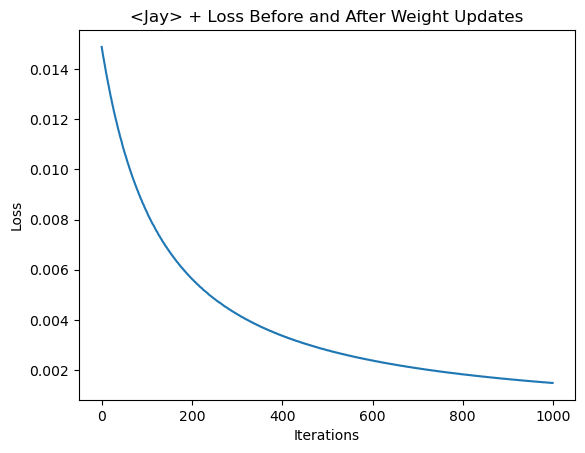

In [527]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.1

for iteration in range(1000):
    # provide your code
    # Hints: forward_propagation function with inputs network
    #        compute_loss for y_true and activations[-1]
    #        add loss to losses
    activations = forward_propagation(inputs, network) # computing activations

    loss = compute_loss(y_true, activations[-1]) # computing loss for current iteration
    losses.append(loss) # append the computed loss to the list

    backpropagation(network, activations, y_true, learning_rate) # backpropagate, update weights and biases
    # gradients = backpropagation function
    # update_weights

    
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("<Jay> + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

In [ ]:
# Your code